In [193]:
import sys
sys.path.append('/Users/demos/PycharmProjects/deloitte_hack/')
import seaborn as sns 

import dataCrush as dc
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from os import listdir

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### explore:
- using NGO_DataDisbursement, we explore the expenditure of the NGO for each policy (x-axis) for all regions. Mean values are depicted 

In [194]:
dc = reload(dc)

regios = ['EMRO', 'EURO', 'CENTRAL AFRICA',
          'SEARO', 'WEST AFRICA', 'PAHO',
          'WPRO', 'SOUTH AFRICA', 'EAST AFRICA']

DF = pd.DataFrame()

for reg in regios:
    df = dc.computeEfectvinessRatioPoliciesPerRegion(Region=reg)
    DF = pd.concat([DF,df], axis=1)

In [195]:
print('-> Top expenditure per desease per region <-')
print('----')
for i in range(len(DF.columns)):
    dis = pd.DataFrame(DF[DF.columns[i]].sort_values(ascending=False)).index[0]
    val = pd.DataFrame(pd.DataFrame(DF[DF.columns[i]].sort_values(ascending=False)).ix[1]).values[0]
    print('(disease -> %s)  --- (Region -> %s) --- (expenditure = %.1f USD Mi.)'%(dis, DF.columns[i], val))

-> Top expenditure per desease per region <-
----
(disease -> Measles-Rubella)  --- (Region -> EMRO) --- (expenditure = 319.0 USD Mi.)
(disease -> Rotavirus)  --- (Region -> EURO) --- (expenditure = 187.2 USD Mi.)
(disease -> Measles)  --- (Region -> CENTRAL AFRICA) --- (expenditure = 164.5 USD Mi.)
(disease -> IPV)  --- (Region -> SEARO) --- (expenditure = 187.7 USD Mi.)
(disease -> Ebola EPI Recovery Plan)  --- (Region -> WEST AFRICA) --- (expenditure = 201.6 USD Mi.)
(disease -> HPV)  --- (Region -> PAHO) --- (expenditure = 148.8 USD Mi.)
(disease -> Measles-Rubella)  --- (Region -> WPRO) --- (expenditure = 227.0 USD Mi.)
(disease -> Measles)  --- (Region -> SOUTH AFRICA) --- (expenditure = 282.0 USD Mi.)
(disease -> HPV)  --- (Region -> EAST AFRICA) --- (expenditure = 255.3 USD Mi.)


### Xplore further and get nice visualization as a funtion of time 

In [297]:
data2 = pd.read_csv('data/'+'NGO_DataDisbursement.csv')

In [307]:
data2

,Unnamed: 0,Country,Region,Programme,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,ISO_code
0,1,Afghanistan,EMRO,Pentavalent,NaN,NaN,NaN,NaN,NaN,NaN,...,16242858.11,11590121.74,8787571.23,8341589.95,5980310.23,6353823.37,4.205407e+06,4138221.50,NaN,AFG
1,2,Afghanistan,EMRO,Pneumococcal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5723713.03,28046401.18,2.053767e+07,23668212.50,4860280.00,AFG
2,3,Afghanistan,EMRO,DTP,NaN,NaN,NaN,NaN,NaN,3.227946e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG
3,4,Afghanistan,EMRO,IPV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.424155e+06,NaN,416700.00,AFG
4,5,Albania,EURO,HepB,39000.00,106889.00,52028.00,53093.00,112158.62,4.022363e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALB
5,6,Albania,EURO,Hib,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALB
6,7,Albania,EURO,Pentavalent,NaN,NaN,NaN,NaN,NaN,NaN,...,516314.22,339345.73,357534.96,324555.21,169520.56,NaN,NaN,NaN,NaN,ALB
7,8,Angola,CENTRAL AFRICA,Pentavalent,NaN,NaN,NaN,NaN,NaN,9.955433e+06,...,11160833.95,8096165.10,4671888.93,3248895.69,2427931.15,465234.57,8.709753e+05,NaN,NaN,AGO
8,9,Angola,CENTRAL AFRICA,Pneumococcal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,11437450.52,4824927.87,8059273.31,4.876004e+06,2256509.75,NaN,AGO
9,10,Angola,CENTRAL AFRICA,Rotavirus,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4469600.18,1.598491e+06,1585064.93,NaN,AGO


In [323]:
gd = data2.groupby('Region').mean().T
gd = gd.ix[gd.index[1:-1]]

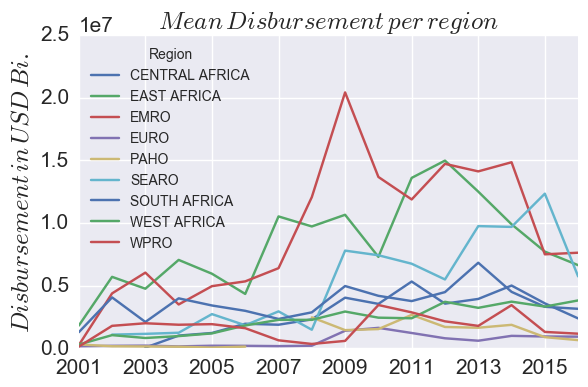

In [324]:
f, ax = plt.subplots(1,1,figsize=(6,4))
#gd.mean(axis=1).plot(kind='area', color='k',alpha=0.3, ax=ax)
#gd.mean(axis=1).plot(color='k', marker='s', ax=ax)
#for i in gd.columns:
gd.plot(ax=ax)
plt.title(r'$Mean\, Disbursement\, per\, region$', fontsize=18)
plt.ylabel('$Disbursement\, in\, USD\, Bi.$', fontsize=18)
plt.tight_layout()
plt.savefig('/Users/demos/Desktop/cnt.pdf')

# Evolution of expenditure and relationship with coverage

In [124]:
# Select a dataset
val = 'WHO_Coverage_estimates.csv'
data = pd.read_csv('data/'+val)

val2 = 'Death rate, crude (per 1,000 people).xls'
data2 = pd.read_excel('data/'+val2)

def getRankedCountriesForGivenVaccine(data, year='2015', vaccine='DTP3'):
    df = dc.getFeaturesFromVacineTrype(data, vaccine=vaccine)
    return df

## Aggregated and per region mean coverage ratio

In [188]:
# PER REGION
df = getRankedCountriesForGivenVaccine(data, year='2015', vaccine='DTP3')
aggData = df.groupby('Region').mean().T
aggData = aggData.ix[aggData.index[1:-1]][::-1]

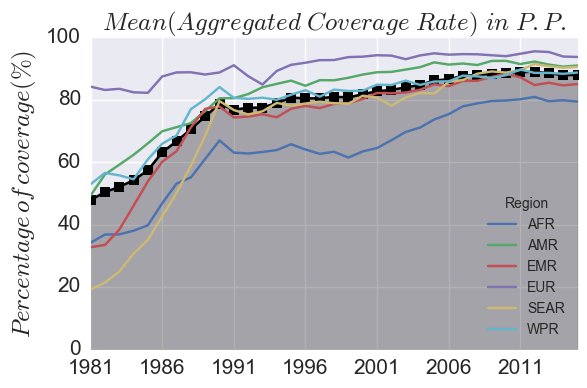

In [191]:
f, ax = plt.subplots(1,1,figsize=(6,4))
df[df.columns[5:-1]].T[::-1].mean(axis=1).plot(kind='area', color='k',
                                              alpha=0.3, ax=ax)
df[df.columns[5:-1]].T[::-1].mean(axis=1).plot(color='k', marker='s', ax=ax)
aggData.plot(ax=ax)
plt.title(r'$Mean(Aggregated$ $Coverage$ $Rate)$ $in$ $P.P.$', fontsize=18)
plt.ylabel('$Percentage\, of\, coverage (\%)$', fontsize=18)
plt.ylim([0,100])
plt.tight_layout()
#plt.savefig('/Users/demos/Desktop/aggCov.pdf')

# AFRICA

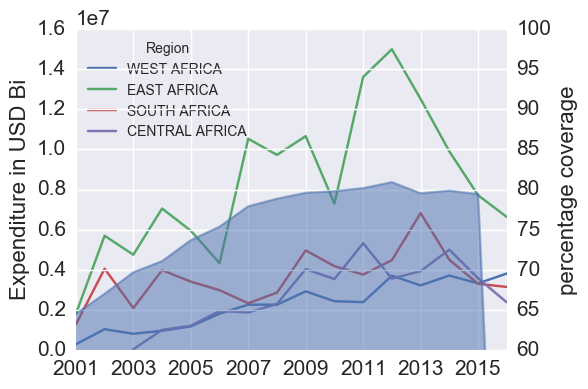

In [273]:
aggtd = gd[['WEST AFRICA','EAST AFRICA', 'SOUTH AFRICA', 'CENTRAL AFRICA']].mean(axis=1).copy()
#aggtd.plot(color='r', marker='s')
gd[['WEST AFRICA','EAST AFRICA', 'SOUTH AFRICA', 'CENTRAL AFRICA']].plot()
plt.ylabel('Expenditure in USD Bi', fontsize=16)
ax=plt.twinx()
aggData['AFR'][gd['WEST AFRICA'].index].plot(ax=ax, kind='area',
                                            alpha=0.5)
ax.set_ylabel('percentage coverage', fontsize=16)
ax.set_ylim([60,100])
plt.tight_layout()
#plt.savefig('/Users/demos/Desktop/exp_per_reg.pdf')